# Monte Carlo Simulation of Ising model

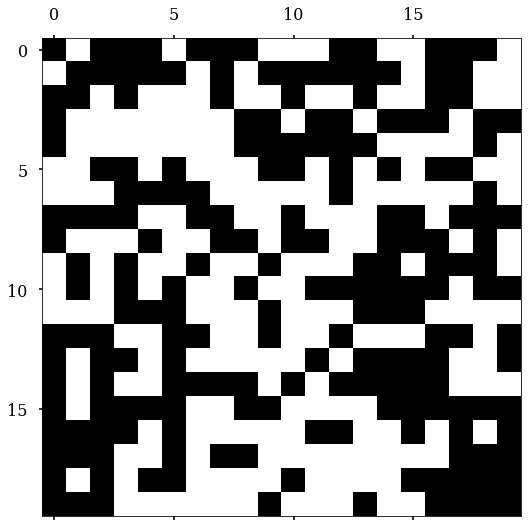

In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
plt.rc('font', family='serif')
plt.style.use('seaborn-poster')
N = 20 # a 20 \times 20 square
init_config = np.round(np.random.rand(20, 20));
#init_config[:, :N//2]=1; init_config[:, N//2:]=0 # As an example, this is a equal interface initial state
plt.spy(init_config); plt.show()
init_config = (init_config-0.5)*2; init_config = np.int_(init_config)

作为初猜的状态，自旋向上与自旋向下的分界线处于中间；

This function returns the **net spin** and the **redistributed spin** state 
using a given **initial config** and **Temperature**

In [2]:
def M_T(input_config, Temperature):
    Spin_config = copy.deepcopy(input_config)
    step = 0
    Net_spin = [np.sum(Spin_config)]
    while step <= 10000:
        site_a = np.round(random.random() * (N-1)); site_b = np.round(random.random() * (N-1))
        site_a = np.int_(site_a); site_b = np.int_(site_b)
        site_a_minus1 = site_a - 1; site_a_plus1 = site_a + 1
        site_b_minus1 = site_b - 1; site_b_plus1 = site_b + 1
        # Here is the boundary condition
        if site_a == 0:
            site_a_minus1 = (N-1)
        if site_a == (N-1):
            site_a_plus1 = 0
        if site_b == 0:
            site_b_minus1 = (N-1)
        if site_b == (N-1):
            site_b_plus1 = 0
        beta_deltaE = - 2 * (1. / Temperature) * (-Spin_config[site_a, site_b]) * (
            Spin_config[site_a, site_b] + Spin_config[site_a_minus1, site_b] +
            Spin_config[site_a_plus1, site_b_minus1]+ Spin_config[site_a, site_b_plus1])
        if beta_deltaE <= 0:
            prob = 1
            Spin_config[site_a, site_b] = (-Spin_config[site_a, site_b])
        else:
            prob = np.exp(-beta_deltaE)
            random_x = random.random() 
            if prob >= random_x:
                Spin_config[site_a, site_b] = (-Spin_config[site_a, site_b])
            else:
                pass
        Net_spin.append(np.sum(Spin_config))
        step += 1 
    return Net_spin, Spin_config

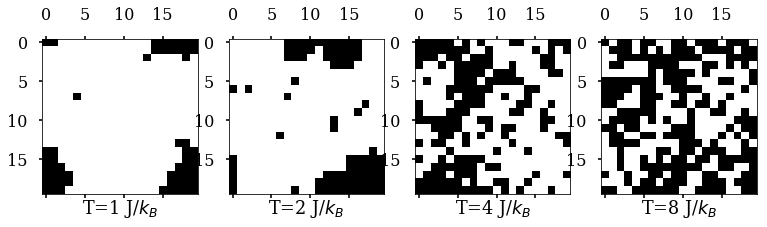

In [3]:
Temperature = [1, 2, 4, 8]
for i in range(4):
    config = M_T(init_config, Temperature[i])[1]
    config = (config + 1) / 2
    plt.subplot(1, 4, i+1); plt.spy(config);plt.xlabel('T=%d J/$k_B$'%Temperature[i])
plt.show()

A rough overview of the temperature influence on the equilibrium state, **5000 moves**

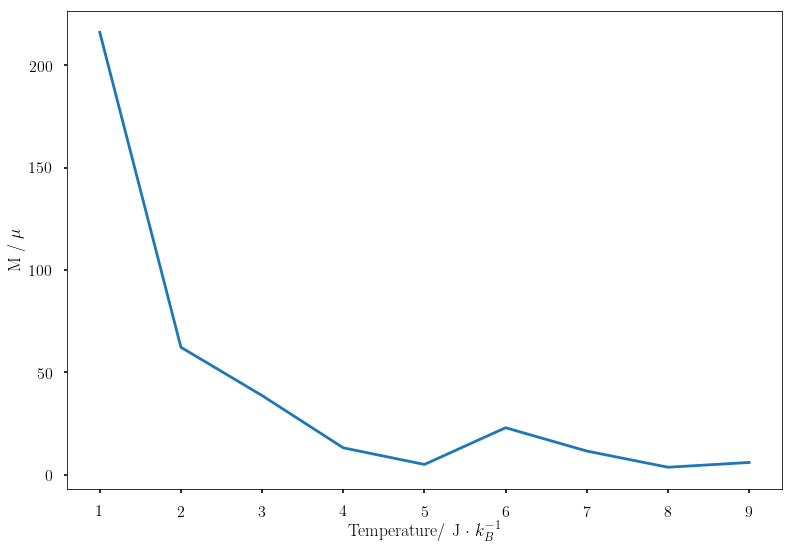

In [4]:
net_spin = []
for i in np.arange(1, 10, 1):
    for j in range(100):
        #print('now', i, j)
        net_spin_j = []
        init_config = np.round(np.random.rand(20, 20));
        init_config = (init_config-0.5)*2; init_config = np.int_(init_config)
        net_spin_i = np.average(M_T(init_config, i)[0])
        net_spin_j.append(np.abs(net_spin_i))
    net_spin.append(np.average(net_spin_j))
plt.rc('text', usetex=True)
plt.plot(np.arange(1, 10, 1), net_spin); 
plt.xlabel('Temperature/ J $\cdot$ $k_B^{-1}$');plt.ylabel('M / $\mu $');plt.show()

Shown above is the temperature dependence of the energy 